In [ ]:
import pandas as pd

# Replace 'your_file_path.csv' with the actual file path
file_path = 'interarrival_times.csv'

# Read data from the CSV file
data = pd.read_csv(file_path)

# Display the data
print(data)

    CustomerID  InterarrivalTime  ArrivalTime
0            1                 2            2
1            2                 2            4
2            3                 2            6
3            4                 3            9
4            5                 2           11
5            6                 2           13
6            7                 3           16
7            8                 2           18
8            9                 2           20
9           10                 2           22
10          11                 2           24
11          12                 2           26
12          13                 2           28
13          14                 1           29
14          15                 1           30
15          16                 2           32
16          17                 1           33
17          18                 2           35
18          19                 2           37
19          20                 1           38
20          21                 3  

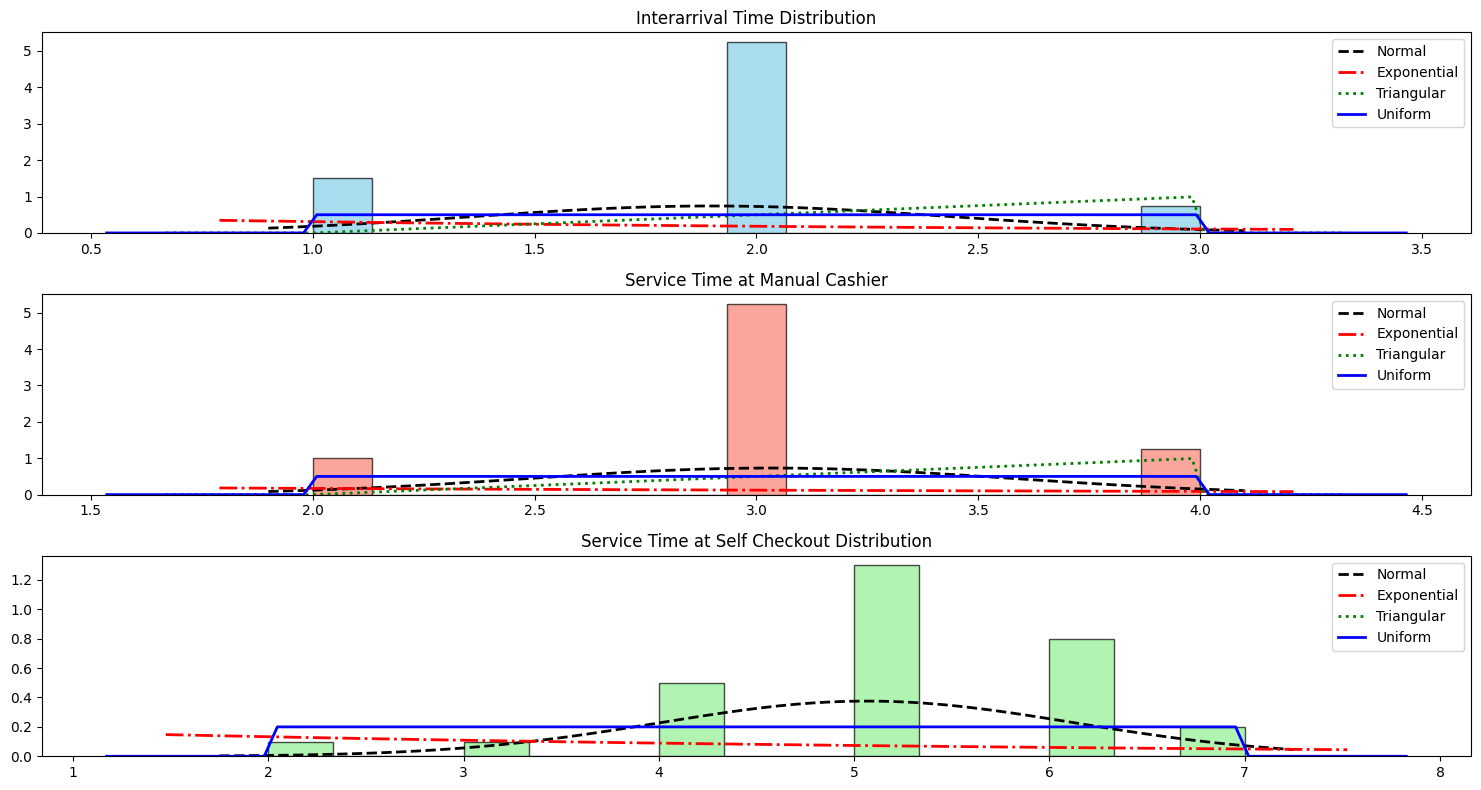

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, triang, uniform

#GETTING FILE
interarrival_file_path = 'interarrival_times.csv'
service_time_self_checkout_file_path = 'service_times_self_checkout.csv'
service_time_manual_cashier_file_path = 'service_times_manual_cashier.csv'

# Read data from CSV files
interarrival_data = pd.read_csv(interarrival_file_path)
service_time_self_checkout_data = pd.read_csv(service_time_self_checkout_file_path)
service_time_manual_cashier_data = pd.read_csv(service_time_manual_cashier_file_path)

# Function to overlay PDFs
def overlay_pdfs(data, distribution, color, label):
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)

    if distribution == 'normal':
        mu, std = norm.fit(data)
        pdf = norm.pdf(x, mu, std)
    elif distribution == 'exponential':
        lambda_param = 1 / data.mean()
        pdf = expon.pdf(x, scale=1/lambda_param)
    elif distribution == 'triangular':
        c = (data.max() - data.min()) / 2  # mode
        pdf = triang.pdf(x, c=c, loc=data.min(), scale=data.max() - data.min())
    elif distribution == 'uniform':
        a, b = data.min(), data.max()
        pdf = uniform.pdf(x, loc=a, scale=b-a)

    plt.plot(x, pdf, color, linewidth=2, label=label)

# Overlay PDFs on all three graphs
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.hist(interarrival_data['InterarrivalTime'], bins=15, density=True, alpha=0.7, color='skyblue', edgecolor='black')
overlay_pdfs(interarrival_data['InterarrivalTime'], 'normal', 'k--', 'Normal')
overlay_pdfs(interarrival_data['InterarrivalTime'], 'exponential', 'r-.', 'Exponential')
overlay_pdfs(interarrival_data['InterarrivalTime'], 'triangular', 'g:', 'Triangular')
overlay_pdfs(interarrival_data['InterarrivalTime'], 'uniform', 'b-', 'Uniform')
plt.title('Interarrival Time Distribution')
plt.legend()

plt.subplot(3, 1, 2)
plt.hist(service_time_self_checkout_data['ServiceTimeSelfCheckout'], bins=15, density=True, alpha=0.7, color='salmon', edgecolor='black')
overlay_pdfs(service_time_self_checkout_data['ServiceTimeSelfCheckout'], 'normal', 'k--', 'Normal')
overlay_pdfs(service_time_self_checkout_data['ServiceTimeSelfCheckout'], 'exponential', 'r-.', 'Exponential')
overlay_pdfs(service_time_self_checkout_data['ServiceTimeSelfCheckout'], 'triangular', 'g:', 'Triangular')
overlay_pdfs(service_time_self_checkout_data['ServiceTimeSelfCheckout'], 'uniform', 'b-', 'Uniform')
plt.title('Service Time at Manual Cashier')
plt.legend()

plt.subplot(3, 1, 3)
plt.hist(service_time_manual_cashier_data['ServiceTimeManualCashier'], bins=15, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
overlay_pdfs(service_time_manual_cashier_data['ServiceTimeManualCashier'], 'normal', 'k--', 'Normal')
overlay_pdfs(service_time_manual_cashier_data['ServiceTimeManualCashier'], 'exponential', 'r-.', 'Exponential')
overlay_pdfs(service_time_manual_cashier_data['ServiceTimeManualCashier'], 'triangular', 'g:', 'Triangular')
overlay_pdfs(service_time_manual_cashier_data['ServiceTimeManualCashier'], 'uniform', 'b-', 'Uniform')
plt.title('Service Time at Self Checkout Distribution')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#Calculating mean and std for interarrival time.
import pandas as pd

# Replace 'your_file_path.csv' with the actual file path
file_path = 'interarrival_times.csv'

# Read data from the CSV file
data = pd.read_csv(file_path)

# Calculate the mean and standard deviation of the 'InterarrivalTime' column
interarrival_time_mean = data['InterarrivalTime'].mean()
interarrival_time_std = data['InterarrivalTime'].std()

# Print the results
print(f"The mean of the interarrival time is: {interarrival_time_mean}")
print(f"The standard deviation of the interarrival time is: {interarrival_time_std}")


The mean of the interarrival time is: 1.9
The standard deviation of the interarrival time is: 0.5477225575051661


In [ ]:
#Calculating mean and std for manual cashier lane
import pandas as pd

# Replace 'your_file_path.csv' with the actual file path
file_path = 'service_times_manual_cashier.csv'

# Read data from the CSV file
data = pd.read_csv(file_path)

# Calculate the mean and standard deviation of the 'InterarrivalTime' column
interarrival_time_mean = data['ServiceTimeManualCashier'].mean()
interarrival_time_std = data['ServiceTimeManualCashier'].std()

# Print the results
print(f"The mean of the manual cashier time is: {interarrival_time_mean}")
print(f"The standard deviation of the manual cashier time is: {interarrival_time_std}")


The mean of the manual cashier time is: 5.066666666666666
The standard deviation of the manual cashier time is: 1.0806553992619587


In [ ]:
import numpy as np
import pandas as pd

# Replace 'your_csv_file.csv' with the actual path to your CSV file
csv_file_path = 'service_times_self_checkout.csv'

# Read data from CSV file
self_checkout_data = pd.read_csv(csv_file_path)['ServiceTimeSelfCheckout'].values

# Calculate minimum, maximum, and mode
minimum_value = np.min(self_checkout_data)
maximum_value = np.max(self_checkout_data)
mode_value = float(np.argmax(np.bincount(self_checkout_data)))

print(f"Minimum: {minimum_value}")
print(f"Maximum: {maximum_value}")
print(f"Mode: {mode_value}")


Minimum: 2
Maximum: 4
Mode: 3.0


**For the checkout lanes**

In [ ]:
import numpy as np

# Constants
NUM_CUSTOMERS = 50
SELF_CHECKOUT_TIME_MIN = 2
SELF_CHECKOUT_TIME_MODE = 3.0
SELF_CHECKOUT_TIME_MAX = 4
MANUAL_CASHIER_TIME_MEAN = 5.06
MANUAL_CASHIER_TIME_STD = 1.08
ARRIVAL_INTERVAL_MEAN = 1.9
ARRIVAL_INTERVAL_STD = 0.55

# Checkout lanes
class CheckoutLanes:
    def __init__(self, num_self_checkout_lanes, num_manual_lanes):
        self.self_checkout_lanes = num_self_checkout_lanes
        self.manual_lanes = num_manual_lanes
        self.waiting_times = []
        self.total_self_checkout_time = 0
        self.total_manual_lane_time = 0
        self.self_checkout_utilization = []
        self.manual_lane_utilization = []

    def process_customer_self_checkout(self, customer, current_time):
        print(f"Customer {customer} arrived at self-checkout at {current_time:.2f} minutes")
        start_time = current_time
        checkout_time = max(0, np.random.triangular(SELF_CHECKOUT_TIME_MIN, SELF_CHECKOUT_TIME_MODE, SELF_CHECKOUT_TIME_MAX))
        departure_time = current_time + checkout_time
        print(f"Customer {customer} completed self-checkout at {departure_time:.2f} minutes")
        waiting_time = departure_time - current_time
        self.waiting_times.append(waiting_time)
        self.total_self_checkout_time += checkout_time
        self.self_checkout_utilization.append(checkout_time)  # Self-checkout server was actively processing a customer

        return departure_time

    def process_customer_manual_lane(self, customer, current_time):
        print(f"Customer {customer} arrived at manual lane with cashier at {current_time:.2f} minutes")
        start_time = current_time
        checkout_time = max(0, np.random.normal(MANUAL_CASHIER_TIME_MEAN, MANUAL_CASHIER_TIME_STD))
        departure_time = current_time + checkout_time
        print(f"Customer {customer} completed manual lane with cashier at {departure_time:.2f} minutes")
        waiting_time = departure_time - current_time
        self.waiting_times.append(waiting_time)
        self.total_manual_lane_time += checkout_time
        self.manual_lane_utilization.append(checkout_time)  # Manual lane server was actively processing a customer

        return departure_time

# Customer generator
def customer_generator(num_customers, checkout_lanes):
    for i in range(num_customers):
        yield np.random.normal(ARRIVAL_INTERVAL_MEAN, ARRIVAL_INTERVAL_STD)

# Run simulation
checkout_lanes = CheckoutLanes(num_self_checkout_lanes=1, num_manual_lanes=1)
customer_gen = customer_generator(NUM_CUSTOMERS, checkout_lanes)

current_time = 0
for customer_id, arrival_interval in enumerate(customer_gen):
    current_time += arrival_interval
    choice = np.random.choice(["self_checkout", "manual_lane"])

    if choice == "self_checkout":
        current_time = checkout_lanes.process_customer_self_checkout(customer_id + 1, current_time)
    else:
        current_time = checkout_lanes.process_customer_manual_lane(customer_id + 1, current_time)

# Output waiting times and server utilization
average_waiting_time = sum(checkout_lanes.waiting_times) / len(checkout_lanes.waiting_times)
average_self_checkout_utilization = sum(checkout_lanes.self_checkout_utilization) / current_time
average_manual_lane_utilization = sum(checkout_lanes.manual_lane_utilization) / current_time

print(f"\nAverage waiting time: {average_waiting_time:.2f} minutes")
print(f"Average self-checkout server utilization: {average_self_checkout_utilization:.2%}")
print(f"Average manual lane server utilization: {average_manual_lane_utilization:.2%}")


Customer 1 arrived at manual lane with cashier at 2.09 minutes
Customer 1 completed manual lane with cashier at 6.93 minutes
Customer 2 arrived at self-checkout at 9.59 minutes
Customer 2 completed self-checkout at 12.77 minutes
Customer 3 arrived at manual lane with cashier at 14.17 minutes
Customer 3 completed manual lane with cashier at 19.42 minutes
Customer 4 arrived at manual lane with cashier at 21.06 minutes
Customer 4 completed manual lane with cashier at 26.21 minutes
Customer 5 arrived at manual lane with cashier at 28.95 minutes
Customer 5 completed manual lane with cashier at 35.10 minutes
Customer 6 arrived at manual lane with cashier at 38.42 minutes
Customer 6 completed manual lane with cashier at 43.74 minutes
Customer 7 arrived at manual lane with cashier at 45.70 minutes
Customer 7 completed manual lane with cashier at 50.67 minutes
Customer 8 arrived at manual lane with cashier at 52.76 minutes
Customer 8 completed manual lane with cashier at 57.94 minutes
Customer 

In [ ]:
import numpy as np
import queue

# Constants
NUM_CUSTOMERS = 50
SELF_CHECKOUT_TIME_MIN = 2
SELF_CHECKOUT_TIME_MODE = 3.0
SELF_CHECKOUT_TIME_MAX = 4
MANUAL_CASHIER_TIME_MEAN = 5.06
MANUAL_CASHIER_TIME_STD = 1.08
ARRIVAL_INTERVAL_MEAN = 1.9
ARRIVAL_INTERVAL_STD = 0.55

# Checkout lanes
class CheckoutLanes:
    def __init__(self, num_self_checkout_lanes, num_manual_lanes):
        self.self_checkout_lanes = num_self_checkout_lanes
        self.manual_lanes = num_manual_lanes
        self.waiting_times = []
        self.total_self_checkout_time = 0
        self.total_manual_lane_time = 0
        self.self_checkout_utilization = []
        self.manual_lane_utilization = []
        self.self_checkout_queue = queue.Queue()
        self.manual_lane_queue = queue.Queue()

    def process_customer_self_checkout(self, customer, current_time):
        print(f"Customer {customer} arrived at self-checkout at {current_time:.2f} minutes")
        start_time = current_time
        checkout_time = max(0, np.random.triangular(SELF_CHECKOUT_TIME_MIN, SELF_CHECKOUT_TIME_MODE, SELF_CHECKOUT_TIME_MAX))
        departure_time = current_time + checkout_time
        print(f"Customer {customer} completed self-checkout at {departure_time:.2f} minutes")
        waiting_time = departure_time - current_time
        self.waiting_times.append(waiting_time)
        self.total_self_checkout_time += checkout_time
        self.self_checkout_utilization.append((start_time, departure_time))

    def process_customer_manual_lane(self, customer, current_time):
        print(f"Customer {customer} arrived at manual lane with cashier at {current_time:.2f} minutes")
        start_time = current_time
        checkout_time = max(0, np.random.normal(MANUAL_CASHIER_TIME_MEAN, MANUAL_CASHIER_TIME_STD))
        departure_time = current_time + checkout_time
        print(f"Customer {customer} completed manual lane with cashier at {departure_time:.2f} minutes")
        waiting_time = departure_time - current_time
        self.waiting_times.append(waiting_time)
        self.total_manual_lane_time += checkout_time
        self.manual_lane_utilization.append((start_time, departure_time))

    def calculate_server_utilization(self, utilization_list, current_time):
        total_utilization = sum(end - start for start, end in utilization_list)
        return total_utilization / current_time

# Customer generator
def customer_generator(num_customers, checkout_lanes):
    for i in range(num_customers):
        yield np.random.normal(ARRIVAL_INTERVAL_MEAN, ARRIVAL_INTERVAL_STD)

# Run simulation
checkout_lanes = CheckoutLanes(num_self_checkout_lanes=1, num_manual_lanes=1)
customer_gen = customer_generator(NUM_CUSTOMERS, checkout_lanes)

current_time = 0
for customer_id, arrival_interval in enumerate(customer_gen):
    current_time += arrival_interval
    choice = np.random.choice(["self_checkout", "manual_lane"])

    if choice == "self_checkout":
        checkout_lanes.self_checkout_queue.put((customer_id + 1, current_time))
    else:
        checkout_lanes.manual_lane_queue.put((customer_id + 1, current_time))

# Process customers in separate queues
while not checkout_lanes.self_checkout_queue.empty():
    customer, arrival_time = checkout_lanes.self_checkout_queue.get()
    checkout_lanes.process_customer_self_checkout(customer, arrival_time)

while not checkout_lanes.manual_lane_queue.empty():
    customer, arrival_time = checkout_lanes.manual_lane_queue.get()
    checkout_lanes.process_customer_manual_lane(customer, arrival_time)

# Output waiting times and server utilization
average_waiting_time = sum(checkout_lanes.waiting_times) / len(checkout_lanes.waiting_times)
average_self_checkout_utilization = checkout_lanes.calculate_server_utilization(checkout_lanes.self_checkout_utilization, current_time)
average_manual_lane_utilization = checkout_lanes.calculate_server_utilization(checkout_lanes.manual_lane_utilization, current_time)

print(f"\nAverage waiting time: {average_waiting_time:.2f} minutes")
print(f"Average self-checkout server utilization: {average_self_checkout_utilization:.2%}")
print(f"Average manual lane server utilization: {average_manual_lane_utilization:.2%}")


Customer 1 arrived at self-checkout at 2.88 minutes
Customer 1 completed self-checkout at 5.50 minutes
Customer 3 arrived at self-checkout at 7.26 minutes
Customer 3 completed self-checkout at 9.89 minutes
Customer 4 arrived at self-checkout at 8.71 minutes
Customer 4 completed self-checkout at 11.24 minutes
Customer 6 arrived at self-checkout at 14.41 minutes
Customer 6 completed self-checkout at 17.68 minutes
Customer 7 arrived at self-checkout at 16.82 minutes
Customer 7 completed self-checkout at 19.32 minutes
Customer 9 arrived at self-checkout at 21.27 minutes
Customer 9 completed self-checkout at 23.81 minutes
Customer 10 arrived at self-checkout at 23.64 minutes
Customer 10 completed self-checkout at 26.20 minutes
Customer 14 arrived at self-checkout at 32.40 minutes
Customer 14 completed self-checkout at 34.83 minutes
Customer 21 arrived at self-checkout at 46.40 minutes
Customer 21 completed self-checkout at 49.56 minutes
Customer 25 arrived at self-checkout at 55.85 minutes


In [ ]:
import numpy as np
import queue

# Constants
NUM_CUSTOMERS = 100
SELF_CHECKOUT_TIME_MIN = 2
SELF_CHECKOUT_TIME_MODE = 3.0
SELF_CHECKOUT_TIME_MAX = 4
MANUAL_CASHIER_TIME_MEAN = 5.06
MANUAL_CASHIER_TIME_STD = 1.08
ARRIVAL_INTERVAL_MEAN = 1.9
ARRIVAL_INTERVAL_STD = 0.55

# Checkout lanes
class CheckoutLanes:
    def __init__(self, num_self_checkout_lanes, num_manual_lanes):
        self.self_checkout_lanes = num_self_checkout_lanes
        self.manual_lanes = num_manual_lanes
        self.waiting_times = []
        self.total_self_checkout_time = 0
        self.total_manual_lane_time = 0
        self.self_checkout_utilization = []
        self.manual_lane_utilization = []
        self.self_checkout_queue = queue.Queue()
        self.manual_lane_queue = queue.Queue()

    def process_customer_self_checkout(self, customer, current_time):
        print(f"Customer {customer} arrived at self-checkout at {current_time:.2f} minutes")
        start_time = current_time
        checkout_time = max(0, np.random.triangular(SELF_CHECKOUT_TIME_MIN, SELF_CHECKOUT_TIME_MODE, SELF_CHECKOUT_TIME_MAX))
        departure_time = current_time + checkout_time
        print(f"Customer {customer} completed self-checkout at {departure_time:.2f} minutes")
        waiting_time = departure_time - current_time
        self.waiting_times.append(waiting_time)
        self.total_self_checkout_time += checkout_time
        self.self_checkout_utilization.append((start_time, departure_time))

    def process_customer_manual_lane(self, customer, current_time):
        print(f"Customer {customer} arrived at manual lane with cashier at {current_time:.2f} minutes")
        start_time = current_time
        checkout_time = max(0, np.random.normal(MANUAL_CASHIER_TIME_MEAN, MANUAL_CASHIER_TIME_STD))
        departure_time = current_time + checkout_time
        print(f"Customer {customer} completed manual lane with cashier at {departure_time:.2f} minutes")
        waiting_time = departure_time - current_time
        self.waiting_times.append(waiting_time)
        self.total_manual_lane_time += checkout_time
        self.manual_lane_utilization.append((start_time, departure_time))

    def calculate_server_utilization(self, utilization_list, current_time):
        total_utilization = sum(end - start for start, end in utilization_list)
        return total_utilization / current_time

# Customer generator
def customer_generator(num_customers, checkout_lanes):
    for i in range(num_customers):
        yield np.random.normal(ARRIVAL_INTERVAL_MEAN, ARRIVAL_INTERVAL_STD)

# Run simulation
checkout_lanes = CheckoutLanes(num_self_checkout_lanes=1, num_manual_lanes=1)
customer_gen = customer_generator(NUM_CUSTOMERS, checkout_lanes)

current_time = 0
for customer_id, arrival_interval in enumerate(customer_gen):
    current_time += arrival_interval
    choice = np.random.choice(["self_checkout", "manual_lane"])

    if choice == "self_checkout":
        checkout_lanes.self_checkout_queue.put((customer_id + 1, current_time))
    else:
        checkout_lanes.manual_lane_queue.put((customer_id + 1, current_time))

# Process customers in separate queues
while not checkout_lanes.self_checkout_queue.empty():
    customer, arrival_time = checkout_lanes.self_checkout_queue.get()
    checkout_lanes.process_customer_self_checkout(customer, arrival_time)

while not checkout_lanes.manual_lane_queue.empty():
    customer, arrival_time = checkout_lanes.manual_lane_queue.get()
    checkout_lanes.process_customer_manual_lane(customer, arrival_time)

# Output waiting times and server utilization
average_waiting_time = sum(checkout_lanes.waiting_times) / len(checkout_lanes.waiting_times)
average_self_checkout_utilization = checkout_lanes.calculate_server_utilization(checkout_lanes.self_checkout_utilization, current_time)
average_manual_lane_utilization = checkout_lanes.calculate_server_utilization(checkout_lanes.manual_lane_utilization, current_time)

print(f"\nAverage waiting time: {average_waiting_time:.2f} minutes")
print(f"Average self-checkout server utilization: {average_self_checkout_utilization:.2%}")
print(f"Average manual lane server utilization: {average_manual_lane_utilization:.2%}")


Customer 1 arrived at self-checkout at 1.67 minutes
Customer 1 completed self-checkout at 4.59 minutes
Customer 3 arrived at self-checkout at 5.78 minutes
Customer 3 completed self-checkout at 8.63 minutes
Customer 4 arrived at self-checkout at 7.34 minutes
Customer 4 completed self-checkout at 10.35 minutes
Customer 5 arrived at self-checkout at 8.80 minutes
Customer 5 completed self-checkout at 11.74 minutes
Customer 7 arrived at self-checkout at 12.76 minutes
Customer 7 completed self-checkout at 15.67 minutes
Customer 10 arrived at self-checkout at 18.64 minutes
Customer 10 completed self-checkout at 21.85 minutes
Customer 14 arrived at self-checkout at 24.93 minutes
Customer 14 completed self-checkout at 27.20 minutes
Customer 15 arrived at self-checkout at 27.29 minutes
Customer 15 completed self-checkout at 30.23 minutes
Customer 17 arrived at self-checkout at 31.49 minutes
Customer 17 completed self-checkout at 34.95 minutes
Customer 18 arrived at self-checkout at 33.28 minutes